In [43]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Stress.csv')

In [4]:
df.sample(5)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
2605,relationships,7snufx,"(35, 40)",I feel like I have the worst luck with everyth...,1,1.000000,1516807928
2359,survivorsofabuse,6hy8fu,"[0, 5]","Hello, I'm 22, female and from the UK. I'm kin...",1,0.800000,1497765938
1033,assistance,8q2yft,"(0, 5)",Hey everyone! I'm going to start by saying tha...,0,0.600000,1528656956
2478,relationships,7oer2s,"[35, 40]",She taught me a bunch at first. In the beginni...,0,0.833333,1515190153
760,assistance,74v7gx,"[6, 11]",What would your arguments be? To me it seems t...,0,1.000000,1507387137


In [5]:
df['text'][1281]

"Someone I know has been compulsively chattering their teeth. They told me it started because they could feel their teeth wobble a little when they clenched their teeth together while feeling them with their finger (we all know this is just one of those weird tricks the teeth play on you) but it's become compulsive now. They told me they feel ill from it. They don't have any anxiety issues and the chattering is just a result of the above but I can see how it would become one. What can be done to make this go away?"

In [6]:
df.shape

(2838, 7)

In [7]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [10]:
df =df.drop(columns=['subreddit','post_id','social_timestamp','sentence_range','confidence'])

In [11]:
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [12]:
df['label'].unique()

array([1, 0])

In [13]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [14]:
import nltk
import re
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from urllib.parse import urlparse

In [18]:
def text_preprocessing(sent):
  # url removing
  sent = [word for word in sent.split() if not urlparse(word).scheme]
  sent = ' '.join(sent)

  # removing escap characters
  sent = re.sub(r'\@\w+','',sent)

  # removing html tags
  sent = re.sub(re.compile("<.*?>"),'',sent)

  # getting only characters and numbers from text
  sent = re.sub("[^A-Za-z0-9]",' ',sent)

  # lower case all words
  sent = sent.lower()

  # strip all words from sentences
  sent = [word.strip() for word in sent.split()]
  sent = ' '.join(sent)

  # word tokenization
  tokens = word_tokenize(sent)

  # removing words which are in stopwords
  for word in tokens:
      if word in stop_words:
          tokens.remove(word)
  # lemmatization
  sent = [lemmatizer.lemmatize(word) for word in tokens]
  sent = ' '.join(sent)
  return sent

In [21]:
df['processed_text'] = df['text'].apply(lambda text: text_preprocessing(text))


In [22]:
df['text'][200]

"So what I am asking is someone or somebody's to help me with the rest of the repair cost. The repair is 575 dollars, I have about 200 of that currently, I need to get this done soon before I am stuck on the side of the road with a broken down vehicle and spending unnecessary money on Ubers or Lyft. I'm willing to pay back monthly with acceptable interest until it's paid in full. I get paid bi-weekly at my full time job. Thanks in advance!"

In [23]:
df['processed_text'][200]

'what asking someone somebody help rest repair cost the repair 575 dollar have 200 that currently need get done soon am stuck the side the road a broken vehicle spending unnecessary money ubers lyft m willing to pay back monthly with acceptable interest it paid full i get paid bi weekly my full time job thanks advance'

## EDA
Word Clouds for the stress condition with label 1

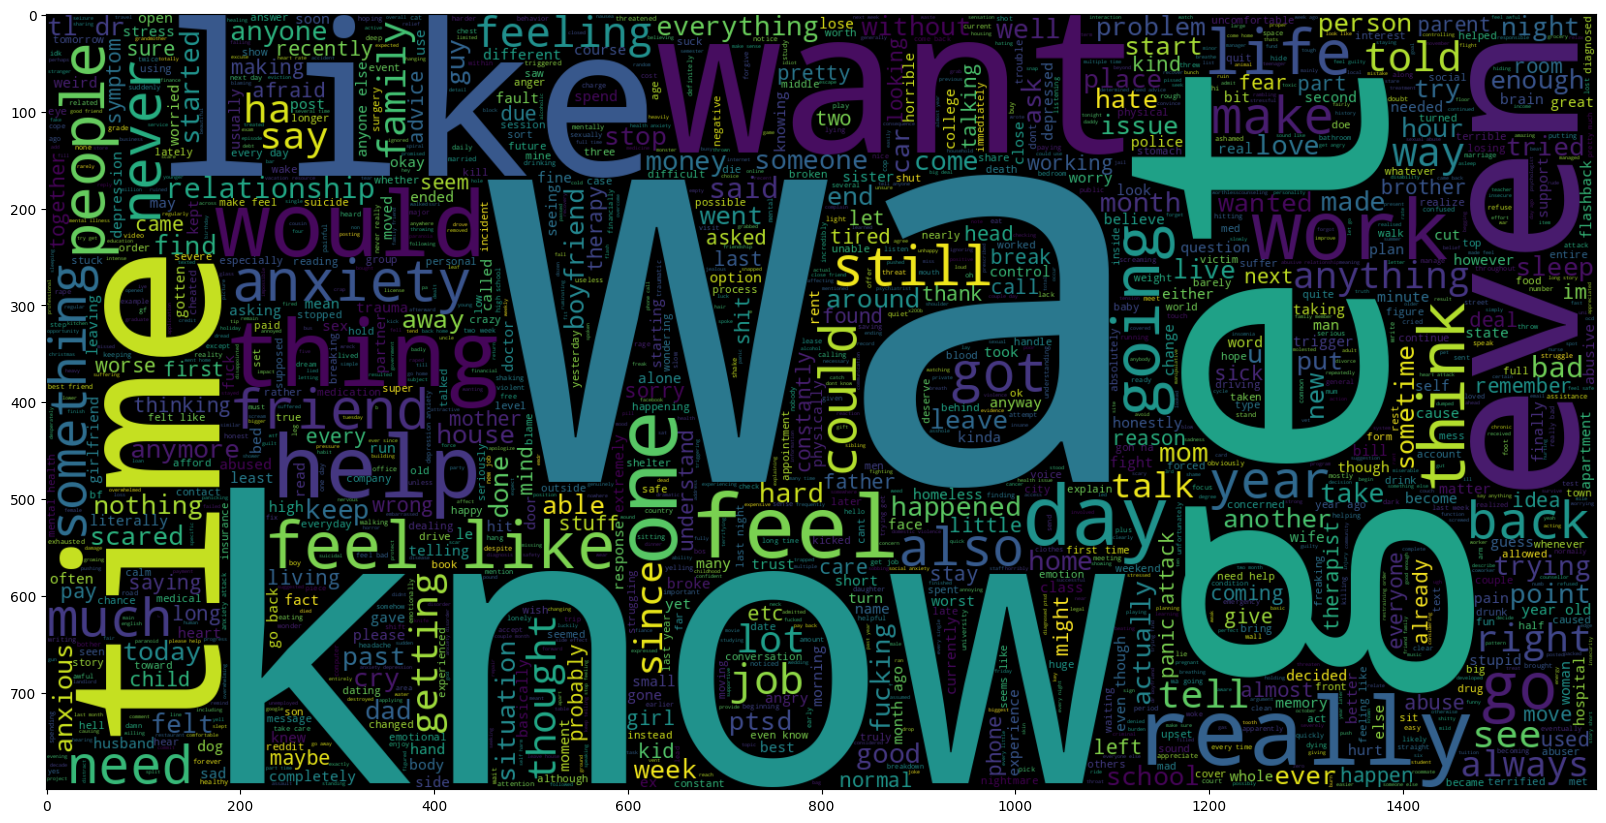

In [210]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].processed_text))
plt.imshow(wc, interpolation = 'bilinear')

Word Clouds for the stress condition with label 0

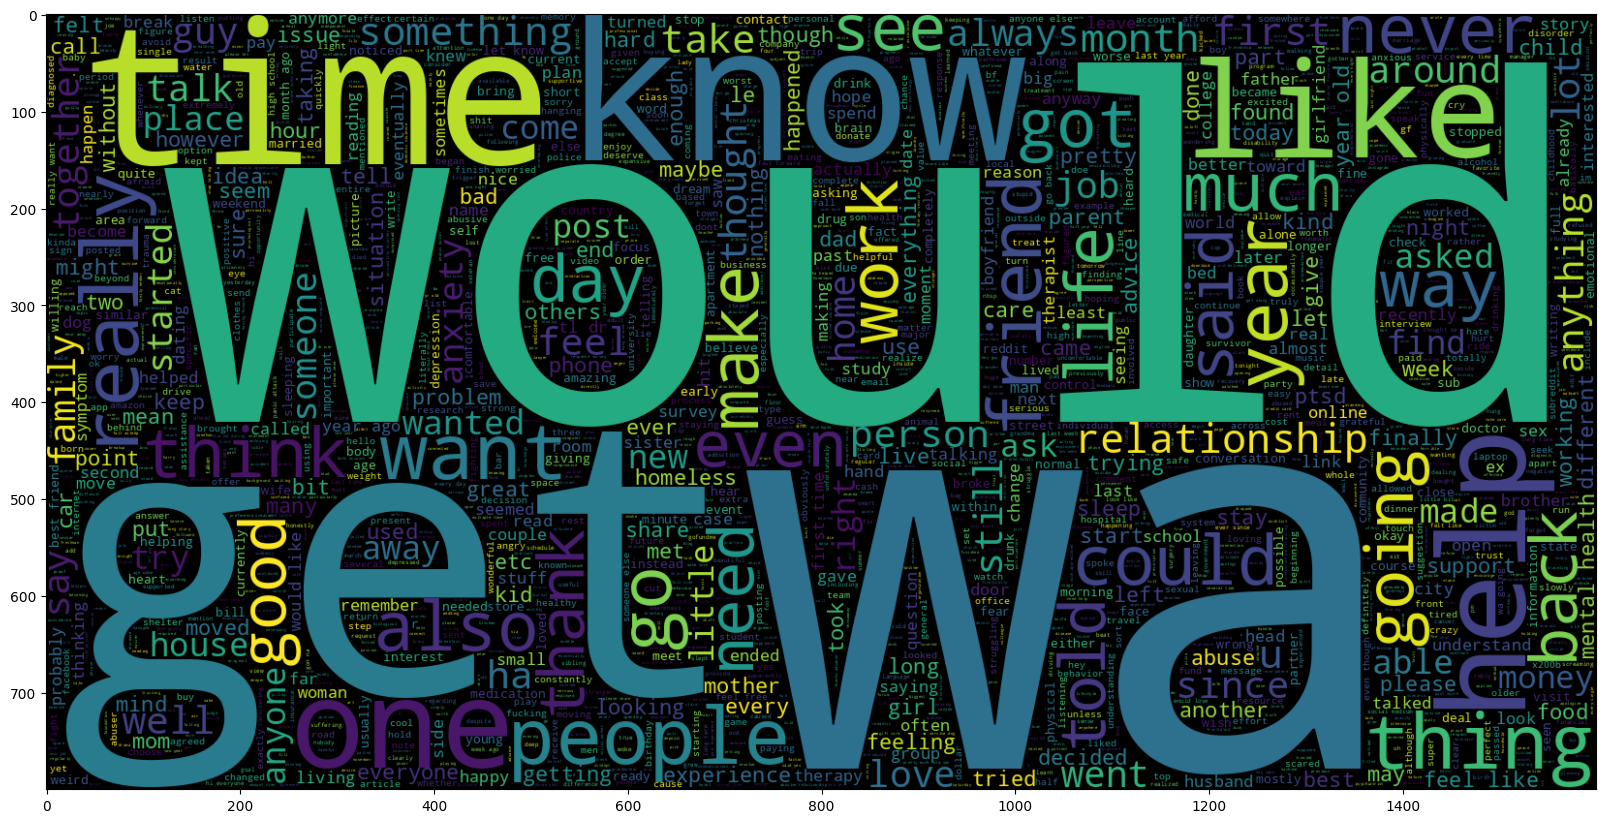

In [211]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].processed_text))
plt.imshow(wc, interpolation = 'bilinear')

In [234]:
import plotly.express as px
fig = px.histogram(df , x = [len(x) for x in df.processed_text], nbins = 50,labels={'label':'Stress Condition'},
                  color=df.label)
fig.show()

## Vectorization using

BOW (Bag Of Words) / TF-IDF vectorizer


# Good to know
min_df<br>
token_pattern

```
min_df = float in range [0.0, 1.0] or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.

token_pattern = str or None, default=r”(?u)\b\w\w+\b”
Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'. The default regexp select tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).
```



In [78]:
# BOW (Bag Of Words)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_df = cv.fit_transform(df['processed_text'])
#cv_df.toarray()

In [75]:
# TF-IDF (Term frequency - inverse document frequency)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf_df = tf.fit_transform(df['processed_text'])
#tf_df.toarray()

In [79]:
cv_df.shape,tf_df.shape

((2838, 10270), (2838, 10270))

# Model Building
with


1. Logistic Regression,
2. Multonomial Naive Bayes,
3. RandomForestClassifier
4. SVM

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## Using above Models with BOW Vectorization

In [166]:
X_train,X_test,y_train,y_test = train_test_split(cv_df,df['label'],stratify=df['label'], random_state=20)
X_train.shape,y_test.shape

((2128, 10270), (710,))

In [167]:
# Logistic regression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_score(y_pred_lr,y_test)

0.7422535211267606

In [168]:
# Multinomial Naive Bayes

model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_score(y_pred_nb,y_test)

0.7549295774647887

In [169]:
# Random Forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_score(y_pred_rf,y_test)

0.7605633802816901

In [170]:
# SVC

model_svc = SVC()
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)
accuracy_score(y_pred_svc,y_test)

0.7338028169014085

# Using above Models with Tf-idf Vectorization

In [178]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(tf_df,df['label'],stratify=df['label'], random_state=20)
X_train1.shape,y_test1.shape

((2128, 10270), (710,))

In [179]:
# Logistic Regression

model_lr1 = LogisticRegression()
model_lr1.fit(X_train1,y_train1)
y_pred_lr1 = model_lr1.predict(X_test1)
accuracy_score(y_pred_lr1,y_test1)

0.7549295774647887

In [180]:
# Multinomial Naive Bayes

model_nb1 = MultinomialNB()
model_nb1.fit(X_train1,y_train1)
y_pred_nb1 = model_nb1.predict(X_test1)
accuracy_score(y_pred_nb1,y_test1)

0.704225352112676

In [181]:
# Random Forest

model_rf1 = RandomForestClassifier()
model_rf1.fit(X_train1,y_train1)
y_pred_rf1 = model_rf1.predict(X_test1)
accuracy_score(y_pred_rf1,y_test1)

0.747887323943662

In [182]:
# SVC

model_svc1 = SVC()
model_svc1.fit(X_train1,y_train1)
y_pred_svc1 = model_svc1.predict(X_test1)
accuracy_score(y_pred_svc1,y_test1)

0.7577464788732394

Best result with random forest and BOW vectorization

# Validation
* Confusion matrix
* Classification report<br>
As we can see Logistic regression is giving best results





In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [185]:
y_pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_pred_lr,y_test)

y_pred_lr1 = model_lr1.predict(X_test1)
cm_lr1 = confusion_matrix(y_pred_lr1,y_test1)
print(cm_lr)
print(cm_lr1)

[[249  94]
 [ 89 278]]
[[251  87]
 [ 87 285]]


In [116]:
y_pred_nb = model_nb.predict(X_test)
cm_nb = confusion_matrix(y_pred_nb,y_test)

y_pred_nb1 = model_nb1.predict(X_test1)
cm_nb1 = confusion_matrix(y_pred_nb1,y_test1)
print(cm_nb)
print(cm_nb1)

[[211  53]
 [127 319]]
[[136   9]
 [202 363]]


In [117]:
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_pred_rf,y_test)

y_pred_rf1 = model_rf1.predict(X_test1)
cm_rf1 = confusion_matrix(y_pred_rf1,y_test1)
print(cm_rf)
print(cm_rf1)

[[207  61]
 [131 311]]
[[192  67]
 [146 305]]


In [118]:
y_pred_svc = model_svc.predict(X_test)
cm_svc = confusion_matrix(y_pred_svc,y_test)

y_pred_svc1 = model_svc1.predict(X_test1)
cm_svc1 = confusion_matrix(y_pred_svc1,y_test1)
print(cm_svc)
print(cm_svc1)

[[258 102]
 [ 80 270]]
[[261  97]
 [ 77 275]]


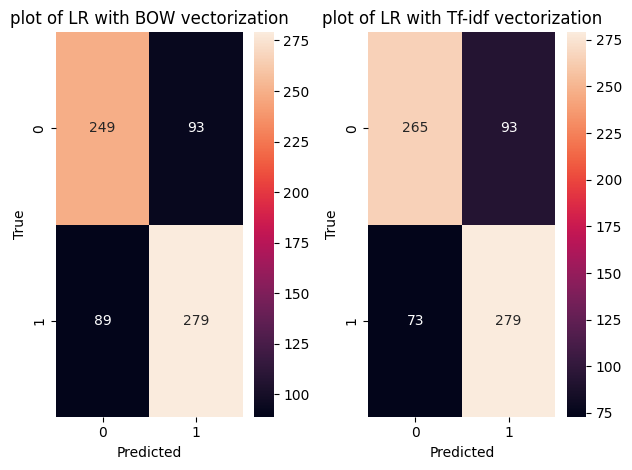

In [124]:
plt.subplot(1, 2, 1)
sns.heatmap(cm_lr,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title('plot of LR with BOW vectorization')
plt.subplot(1, 2, 2)
sns.heatmap(cm_lr1,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title('plot of LR with Tf-idf vectorization')
plt.tight_layout()
plt.show()

In [186]:
print(classification_report(y_pred_lr,y_test))
print(classification_report(y_pred_lr1,y_test1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       343
           1       0.75      0.76      0.75       367

    accuracy                           0.74       710
   macro avg       0.74      0.74      0.74       710
weighted avg       0.74      0.74      0.74       710

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       338
           1       0.77      0.77      0.77       372

    accuracy                           0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710



In [187]:
print(classification_report(y_pred_nb,y_test))
print(classification_report(y_pred_nb1,y_test1))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       276
           1       0.85      0.73      0.78       434

    accuracy                           0.75       710
   macro avg       0.75      0.76      0.75       710
weighted avg       0.77      0.75      0.76       710

              precision    recall  f1-score   support

           0       0.42      0.91      0.57       156
           1       0.96      0.65      0.77       554

    accuracy                           0.70       710
   macro avg       0.69      0.78      0.67       710
weighted avg       0.84      0.70      0.73       710



In [188]:
print(classification_report(y_pred_rf,y_test))
print(classification_report(y_pred_rf1,y_test1))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       280
           1       0.85      0.73      0.79       430

    accuracy                           0.76       710
   macro avg       0.76      0.77      0.76       710
weighted avg       0.78      0.76      0.76       710

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       287
           1       0.83      0.73      0.77       423

    accuracy                           0.75       710
   macro avg       0.74      0.75      0.74       710
weighted avg       0.76      0.75      0.75       710



In [189]:
print(classification_report(y_pred_svc,y_test))
print(classification_report(y_pred_svc1,y_test1))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       353
           1       0.73      0.76      0.74       357

    accuracy                           0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       348
           1       0.76      0.78      0.77       362

    accuracy                           0.76       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.76      0.76       710



Two models are having accuracy score comparable
1. Random forest with BOW
2. SVC with Tfidf

lets fine tune and find the best model

Let's do fineTuning of our models

ROC-AUC Score: 0.8336276006871541


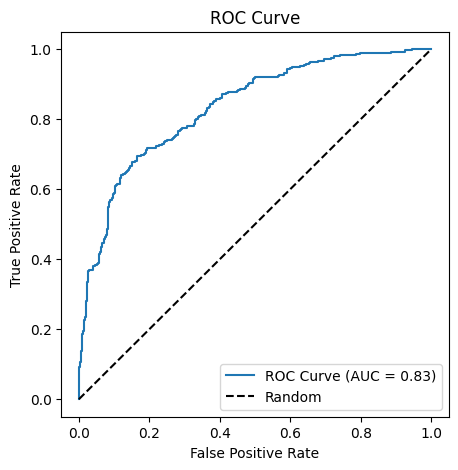

In [72]:
# Lets first find best threshold

from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities on the test set
y_probs = model_lr1.predict_proba(X_test1)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test1, y_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [73]:
# Find the threshold for a specific specificity level (e.g., 0.9)
desired_specificity = 0.9
desired_index = next(i for i, f in enumerate(fpr) if f >= 1 - desired_specificity)

threshold_for_desired_specificity = thresholds[desired_index]
print(f"Threshold for Specificity {desired_specificity}: {threshold_for_desired_specificity}")



Threshold for Specificity 0.9: 0.5898053119006051


In [74]:
# Find the threshold for a specific sensitivity level (e.g., 0.8)
desired_sensitivity = 0.8
desired_index = next(i for i, t in enumerate(tpr) if t >= desired_sensitivity)

threshold_for_desired_sensitivity = thresholds[desired_index]
print(f"Threshold for Sensitivity {desired_sensitivity}: {threshold_for_desired_sensitivity}")

Threshold for Sensitivity 0.8: 0.4768612146239559


In [132]:
from sklearn.metrics import accuracy_score
# Predict probabilities on the test set
y_probs_lr = model_lr.predict_proba(X_test)[:, 1]
y_probs_lr1 = model_lr1.predict_proba(X_test1)[:, 1]

# Set your custom threshold
custom_threshold = 0.6

# Convert probabilities to binary predictions based on the custom threshold
y_pred_custom_threshold_lr = (y_probs_lr > custom_threshold).astype(int)
y_pred_custom_threshold_lr1 = (y_probs_lr1 > custom_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom_threshold_lr = accuracy_score(y_test, y_pred_custom_threshold_lr)
confusion_matrix_custom_threshold_lr = confusion_matrix(y_test, y_pred_custom_threshold_lr)
classification_report_custom_threshold_lr = classification_report(y_test, y_pred_custom_threshold_lr)

accuracy_custom_threshold_lr1 = accuracy_score(y_test1, y_pred_custom_threshold_lr1)
confusion_matrix_custom_threshold_lr1 = confusion_matrix(y_test1, y_pred_custom_threshold_lr1)
classification_report_custom_threshold_lr1 = classification_report(y_test1, y_pred_custom_threshold_lr1)


In [139]:
print('Logistic Regression with custom threshold of 0.6 \n\n')
print('accuacy socre with BOW -\n' , accuracy_custom_threshold_lr,'\n\n')
print('confusion matrix with BOW -\n ', confusion_matrix_custom_threshold_lr,'\n\n')
print('classification report with BOW -\n ',classification_report_custom_threshold_lr,'\n\n' )

Logistic Regression with custom threshold of 0.6 


accuacy socre with BOW -
 0.7394366197183099 


confusion matrix with BOW -
  [[267  71]
 [114 258]] 


classification report with BOW -
                precision    recall  f1-score   support

           0       0.70      0.79      0.74       338
           1       0.78      0.69      0.74       372

    accuracy                           0.74       710
   macro avg       0.74      0.74      0.74       710
weighted avg       0.74      0.74      0.74       710
 




In [140]:
print('Logistic Regression with custom threshold of 0.6 \n\n')
print('accuacy socre with Tfidf -\n' , accuracy_custom_threshold_lr1,'\n\n')
print('confusion matrix with Tfidf -\n ', confusion_matrix_custom_threshold_lr1,'\n\n')
print('classification report with Tfidf -\n ',classification_report_custom_threshold_lr1,'\n\n' )

Logistic Regression with custom threshold of 0.6 


accuacy socre with Tfidf -
 0.7028169014084507 


confusion matrix with Tfidf -
  [[302  36]
 [175 197]] 


classification report with Tfidf -
                precision    recall  f1-score   support

           0       0.63      0.89      0.74       338
           1       0.85      0.53      0.65       372

    accuracy                           0.70       710
   macro avg       0.74      0.71      0.70       710
weighted avg       0.74      0.70      0.69       710
 




No improvement in logistic regrssion with thresholds value

In [190]:
# Fine tune Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Create a GridSearchCV object
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [191]:
# Evaluate the model with the best hyperparameters on the test set
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7549295774647887


In [193]:
# Fine tune SVC with Tfidf vectorizer

# Define hyperparameters to search
param_grid1 = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create a GridSearchCV object
grid_search1 = GridSearchCV(model_svc1, param_grid1, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search1.fit(X_train1, y_train1)

# Print the best hyperparameters
best_params1 = grid_search1.best_params_
print("Best Hyperparameters:", best_params1)



Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [194]:
# Evaluate the model with the best hyperparameters on the test set
best_model1 = grid_search1.best_estimator_
y_pred_svc1 = best_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred_svc1)
print("Accuracy on Test Set:", accuracy1)

Accuracy on Test Set: 0.7464788732394366


In [208]:
def predictor(text):
    processed = text_preprocessing(text)
    embedded_words = tf.transform([text])
    res = best_model_rf.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res

def predictor1(text):
    processed = text_preprocessing(text)
    embedded_words = tf.transform([text])
    res = best_model1.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else:
        res = "this person is not in stress"
    return res



In [209]:
text1 = "He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up feelings of doom in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid are you psychic test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my doom to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours."
print(predictor(text1))
print(predictor1(text1))

this person is not in stress
this person is in stress


In [203]:
text2 = "Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs."
print(predictor(text2))
print(predictor1(text2))

this person is not in stress
this person is not in stress


In [204]:
text3 = "I think he doesn't want to put in the effort for the relationship to work (and we're both so difficult that we have to work on our relationships, doesn't matter with whom) but he can't be without me either. What should I do? I'm afraid this is gonna happen over and over again, because I'm always forgiving him at some point. Am I being strung along? TL;DR: Boyfriend [28,M] broke up with me [23,F] after on-off for 1.5 years, I thought we just got it together and am devastated...don't know what to do, want to keep fighting but should I?"
print(predictor(text3))
print(predictor1(text3))

this person is not in stress
this person is in stress


In [205]:
text4 = "No place in my city has shelter space for us, and I won't put my baby on the literal street. (I've been there before. Fine for new, but I don't want to have to go through that with a baby). What cities have good shelter programs for homeless mothers and children? I'd love to be able to make some calls and get on a greyhound between the 7th and 16th (when I'll likely be able to get the money to go)."
print(predictor(text4))
print(predictor1(text4))

this person is not in stress
this person is in stress


 Random Forest is Miss behaving
so selected model would be : SVC